### Olivina: determinazione del parametro $W_P$ a partire da dati diffrattometrici sul volume di cella (lezione XXIII)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
%matplotlib inline

Fattore di conversione per i volumi da Angstrom^3 (per molecola) a J/bar (per mole) 

In [2]:
Na=6.022141e23  # Numero di Avogadro
Z=4             # numero Z di unità di formula
f1=1e-25        # fattore di conversione angstrom^3 a J/bar

fact=(Na*f1)/Z

Volume della cella elementare (in Angstrom^3) determinato in funzione della frazione molare del componente *forsterite* nella soluzione solida di olivina (dato ricavato da questo [articolo](https://pubs.geoscienceworld.org/msa/ammin/article-abstract/54/5-6/741/540495)).

In [3]:
def V(x):
    return 307.23-15.49*x-2.02*x**2

Funzione per il calcolo del $\Delta V^{mix}$ molare (valore in J/bar):

In [4]:
def V_mix(x):
    V_fa=V(0)
    V_fo=V(1)
    Vol=V(x)-(x*V_fo+(1-x)*V_fa)
    return Vol*fact

Calcolo del parametro $W_P$ per il modello non ideale $W=W_0+W_Px_{Mg}x_{Fe}$. Ricordiamo che $W_P=\left(\frac{\partial W}{\partial P}\right)_{T,X}$ e che $\Delta V^{mix}=W_Px_{Mg}x_{Fe}$

In [5]:
def V_model(x, Wp):
    return Wp*x*(1-x)

x=np.linspace(0,1,16)
Vol=V_mix(x)
fit,err=curve_fit(V_model,x,Vol)
Wp=fit[0]
print("Valore di Wp: %6.2e J/bar per mole" % Wp)

Valore di Wp: 3.04e-02 J/bar per mole


Controllo della qualità del fit:

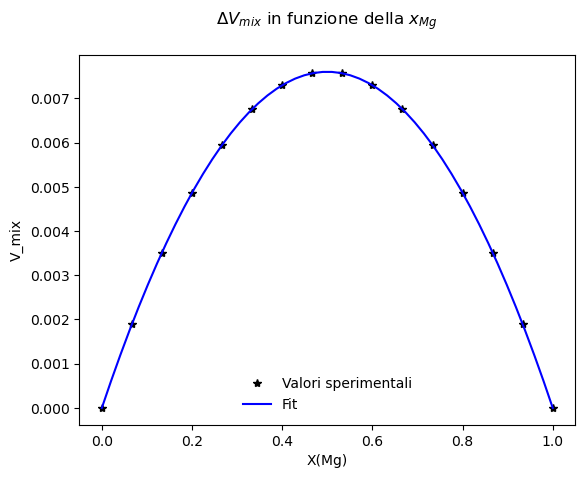

In [6]:
x_list=np.linspace(0,1,50)

v_list=np.array([])
for ix in x_list:
    iv=V_model(ix,Wp)
    v_list=np.append(v_list,iv)
    
plt.figure()
plt.plot(x,Vol,"k*",label="Valori sperimentali")
plt.plot(x_list,v_list,"b-",label="Fit")
plt.xlabel("X(Mg)")
plt.ylabel("V_mix")
tlt=("$\Delta V_{mix}$ in funzione della $x_{Mg}$\n")
plt.title(tlt)
plt.legend(frameon=False)
plt.show()